# Image Modifications
> Author: Hannan Khan  
> Last Updated: 2022-04-07 06:26:01

In [1]:
import os
from PIL import Image

# Renaming images in bulk

In [2]:
numbers_imgs = r'C:\Users\HannanKhan\Downloads\numbers_imgs'
unique_image_id = 0

In [9]:
for number_folder in os.listdir(number_imgs):
    if number_folder.isdigit():
        number_folder_path = number_imgs + fr"\{number_folder}"
        for number_img in os.listdir(number_folder_path):
            number_img_path = number_folder_path + fr"\{number_img}"
            alt_number_img_path = number_folder_path + fr"\{unique_image_id}.png"
            os.rename(number_img_path, alt_number_img_path)
            print(number_img_path)
            print("\t\tRenamed to:\t", alt_number_img_path)
            unique_image_id += 1

C:\Users\HannanKhan\Downloads\numbers_imgs\0\0.png
		Renamed to:	 C:\Users\HannanKhan\Downloads\numbers_imgs\0\0.png
C:\Users\HannanKhan\Downloads\numbers_imgs\0\1.png
		Renamed to:	 C:\Users\HannanKhan\Downloads\numbers_imgs\0\1.png


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HannanKhan\\Downloads\\numbers_imgs\\0\\10.png' -> 'C:\\Users\\HannanKhan\\Downloads\\numbers_imgs\\0\\2.png'

# Resizing images

In [3]:
# original image size is 1874x1874. We will rescale down to 256x256 and also 96x96 just in case.

numbers_imgs = r'C:\Users\HannanKhan\Downloads\numbers_imgs'
resized_numbers_imgs = r'C:\Users\HannanKhan\Downloads\resized_numbers_imgs'

In [ ]:
for number_folder in os.listdir(numbers_imgs):
    if number_folder.isdigit():
        number_folder_path = numbers_imgs + fr"\{number_folder}"
        for number_img in os.listdir(number_folder_path):
            number_img_path = number_folder_path + fr"\{number_img}"
            resized_numbers_imgs_path = resized_numbers_imgs + fr"\{number_folder}\{number_img}"
            orig = Image.open(number_img_path)
            resized = orig.resize((1024,1024))
            resized.save(resized_numbers_imgs_path)

# Augmenting Images

In [7]:
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [8]:
data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sizes = [1874, 1024, 512, 256, 96]
save_dir = r'C:\Users\HannanKhan\Downloads'

In [13]:
numbers_imgs = r'C:\Users\HannanKhan\Downloads\numbers_imgs'

for size in sizes:
    size_dir = save_dir + fr'\augmented_numbers_imgs_{size}_manyAugmentations'
    if not os.path.isdir(size_dir):
        os.mkdir(size_dir)
    for j in range(10):
        input_dir = numbers_imgs + '\\' + str(j)
        print(input_dir)
        size_save_dir = size_dir + fr'\{j}'
        if not os.path.isdir(size_save_dir):
            os.mkdir(size_save_dir)
        i = 0
        for batch in data_generator.flow_from_directory(input_dir,
                                                        batch_size=14,
                                                        target_size=(size,size),
                                                        save_to_dir=size_save_dir):
            i+=1
            if i >= 40:
                break

C:\Users\HannanKhan\Downloads\numbers_imgs\0
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\1
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\2
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\3
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\4
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\5
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\6
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\7
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\8
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\9
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\0
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\1
Found 14 images belo

Now the augmented numbers folders contain both the augmented and original images.

# Renaming Augmented Folders

In [13]:
dataset_dirs = r'D:\Datasets\Ishihara_Numbers'
sizes = [128]

for size in sizes:
    i = 0
    directory = dataset_dirs + fr'\augmented_numbers_imgs_{size}_noShiftAugmentations'
    for number_folder in os.listdir(directory):
        number_folder_path = directory + '\\' + number_folder
        for image_name in os.listdir(number_folder_path):
            image_path = number_folder_path + '\\' + image_name
            print(image_path)
            new_name = number_folder_path + '\\' + str(i) + '.png'
            try:
                os.rename(image_path, new_name)
                print("\t\t\t\tRenamed to:", new_name)
            except FileExistsError:
                print("\t\t\t\tSkipped renaming.")
            i += 1

D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\_0_1160310.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\0.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\_0_1238898.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\1.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\_0_1359518.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\2.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\_0_2745678.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\3.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\_0_2814628.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\0\4.png
D:\Datasets\Ishihara_Numb

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\736.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\_13_3929393.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\737.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\_13_4311894.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\738.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\_13_4538366.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\739.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\_13_4685534.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\740.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\1\_13_5437009.png
				Rename

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\1309.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\_13_8367560.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\1310.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\_13_8533388.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\1311.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\_13_858941.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\1312.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\_13_8617060.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\1313.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\2\_13_8940925.png
				Re

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\2080.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\_6_1397553.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\2081.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\_6_148393.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\2082.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\_6_1494991.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\2083.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\_6_1659581.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\2084.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\3\_6_2039852.png
				Renamed

D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\_10_4898980.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\2849.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\_10_5294332.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\2850.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\_10_5604832.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\2851.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\_10_5753991.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\2852.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\_10_5903197.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\5\2853.png
D:\Da

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\3618.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\_2_6121952.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\3619.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\_2_6138455.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\3620.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\_2_6306798.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\3621.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\_2_6312407.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\3622.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\6\_2_6318318.png
				Rename

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\4355.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\_6_9208662.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\4356.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\_6_9697043.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\4357.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\_6_9723695.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\4358.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\_6_9879657.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\4359.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\7\_7_124222.png
				Renamed

				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\5064.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\_0_763975.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\5065.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\_0_7658714.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\5066.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\_0_7689733.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\5067.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\_0_7897272.png
				Renamed to: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\5068.png
D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\9\_0_8134788.png
				Renamed

# Replace `white` 1 (actually 255) Values With 0 Across All Channels
I have noticed that upon running a CNN, the white values are extremely prevalent across all samples of all classes. The white values (255,255,255) are turned into (1,1,1) by pytorch. So they have a major impact on the model and any kernel filters. This results in each class having approximately the same weight as the other classes.  
In order to circumvent this, I will be turning the image's white values into (0,0,0), so that they will be represented as (0,0,0) in pytorch, and thereby have little effect on the models convolution kernels.

In [14]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
src_dir = r'D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations'
img_size = 128

for split_folder in os.listdir(src_dir):
    split_dir = os.sep.join([src_dir, split_folder])
    for cls_folder in os.listdir(split_dir):
        cls_dir = os.sep.join([split_dir, cls_folder])
        for img_name in os.listdir(cls_dir):
            img_path = os.sep.join([cls_dir, img_name])
            i = np.asarray(Image.open(img_path))
            for j in range(img_size):
                for k in range(img_size):
                    if i[j][k][0] == i[j][k][1] == i[j][k][2] == 255:
                        i[j][k][0] = i[j][k][1] = i[j][k][2] = 0
#                         print(f"{i[j][k][0]},{i[j][k][1]},{i[j][k][2]}white pxl")
            modded = Image.fromarray(i)
            modded.save(img_path)
            print("Modded and saved:", img_path)

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\100.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\105.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\11.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\117.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\121.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\123.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\126.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\127.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\132.png
Modded and 

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\448.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\452.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\453.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\454.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\460.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\461.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\468.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\477.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\0\48.png
Modded and 

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\645.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\647.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\654.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\657.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\658.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\662.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\664.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\669.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\1\670.png
Modded and

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1167.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1168.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1169.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1170.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1171.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1177.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1187.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1189.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1196.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1552.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1554.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1555.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1561.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1572.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1576.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1579.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1581.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\2\1583.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1898.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1902.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1904.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1909.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1910.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1913.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1916.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1920.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\3\1923.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2291.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2297.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2307.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2309.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2316.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2317.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2323.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2328.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2333.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2701.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2703.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2710.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2730.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2737.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2738.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2740.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2743.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\4\2745.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3040.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3043.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3047.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3048.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3050.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3051.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3053.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3062.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\5\3073.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3437.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3443.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3448.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3453.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3455.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3459.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3461.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3464.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3467.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3830.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3850.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3857.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3858.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3860.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3863.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3865.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3867.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\6\3874.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4168.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4170.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4171.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4173.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4182.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4193.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4195.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4208.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\7\4212.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4568.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4573.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4575.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4579.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4581.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4584.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4587.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4590.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4594.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4985.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4987.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4994.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\4998.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\5011.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\5014.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\5026.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\5028.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\8\5034.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5313.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5315.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5328.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5332.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5333.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5342.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5353.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5357.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\test\9\5419.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\130.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\131.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\133.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\134.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\136.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\137.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\138.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\139.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\14.png
Mo

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\225.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\226.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\227.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\228.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\229.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\23.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\230.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\231.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\232.png
Mo

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\307.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\309.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\31.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\311.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\312.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\313.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\315.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\316.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\318.png
Mo

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\392.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\393.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\394.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\395.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\396.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\397.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\398.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\399.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\4.png
Mod

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\467.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\469.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\47.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\470.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\471.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\472.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\473.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\474.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\475.png
Mo

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\559.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\56.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\57.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\59.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\6.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\60.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\62.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\63.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\0\64.png
Modded and

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1056.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1058.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1059.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1060.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1061.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1062.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1063.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1064.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\594.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\595.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\596.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\597.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\598.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\599.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\600.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\601.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\602.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\699.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\700.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\701.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\703.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\704.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\705.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\706.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\707.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\708.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\782.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\783.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\784.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\785.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\786.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\787.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\788.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\789.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\790.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\871.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\873.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\876.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\877.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\878.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\879.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\880.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\882.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\883.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\965.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\966.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\967.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\968.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\969.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\970.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\972.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\973.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\1\975.png
M

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1184.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1185.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1186.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1188.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1190.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1191.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1192.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1193.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1281.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1282.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1283.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1284.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1285.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1286.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1287.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1288.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1380.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1381.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1383.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1384.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1385.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1386.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1387.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1388.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1463.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1464.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1465.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1466.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1467.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1468.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1469.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1470.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1550.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1551.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1553.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1556.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1557.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1558.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1559.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1560.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1646.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1647.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1648.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1649.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1650.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1652.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1653.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1655.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\2\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1748.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1750.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1751.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1752.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1753.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1754.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1755.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1758.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1849.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1850.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1852.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1854.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1855.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1856.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1857.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1858.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1957.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1958.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1959.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1960.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1961.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1962.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1963.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1964.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\1

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2042.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2043.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2044.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2045.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2046.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2047.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2048.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2049.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2137.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2138.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2140.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2142.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2144.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2145.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2146.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2147.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2233.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2237.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\3\2238.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2240.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2241.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2242.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2244.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2245.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2334.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2336.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2337.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2338.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2340.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2342.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2343.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2345.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2431.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2432.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2433.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2434.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2435.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2437.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2438.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2439.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2535.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2536.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2537.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2538.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2539.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2540.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2541.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2543.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2614.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2615.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2616.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2617.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2618.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2620.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2621.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2622.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2719.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2720.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2721.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2722.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2723.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2724.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2725.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2726.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\4\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2812.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2814.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2815.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2816.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2817.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2818.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2819.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2820.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2913.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2916.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2918.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2919.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2920.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2921.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2923.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2924.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\2

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3006.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3008.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3009.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3010.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3011.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3012.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3013.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3015.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3104.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3105.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3106.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3107.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3108.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3109.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3110.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3111.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3185.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3187.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3189.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3190.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3191.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3192.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3196.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3197.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3283.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3284.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3285.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3286.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3287.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3288.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3289.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3291.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\5\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3387.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3389.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3390.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3393.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3394.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3395.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3396.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3397.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3492.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3493.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3495.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3498.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3499.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3500.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3501.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3502.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3588.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3591.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3592.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3594.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3595.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3597.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3598.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3599.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3685.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3686.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3687.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3688.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3689.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3690.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3691.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3692.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3776.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3777.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3778.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3779.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3781.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3782.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3784.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3785.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3876.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3877.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3879.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3880.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3881.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3882.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3883.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3884.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\6\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3974.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3975.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3976.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3978.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3979.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3980.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3981.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3982.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\3

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4075.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4076.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4077.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4078.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4079.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4080.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4081.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4082.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4177.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4178.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4179.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4180.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4181.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4183.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4184.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4185.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4265.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4266.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4267.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4268.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4269.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4270.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4271.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4272.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4362.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4363.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4364.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4365.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4366.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4367.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4368.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4369.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4457.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4458.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4459.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4460.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4461.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4462.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4463.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4464.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\7\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4560.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4561.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4562.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4564.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4565.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4566.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4567.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4569.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4662.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4663.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4664.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4666.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4667.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4668.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4669.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4670.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4762.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4763.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4764.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4765.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4766.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4767.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4769.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4770.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4843.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4844.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4845.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4846.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4847.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4848.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4849.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4850.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4938.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4940.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4942.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4944.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4945.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4946.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4947.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4948.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\4

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\5032.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\5033.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\5037.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\8\5038.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5040.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5041.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5042.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5044.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5134.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5136.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5137.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5138.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5140.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5142.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5143.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5145.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5228.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5229.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5230.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5231.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5232.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5233.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5234.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5235.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5327.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5329.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5330.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5331.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5334.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5335.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5336.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5337.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5408.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5409.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5410.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5411.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5412.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5413.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5414.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5415.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5508.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5509.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5511.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5512.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5513.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5514.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5515.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5516.png
Modded and saved: D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5

Lets take a look at a sample image to see what we have created:

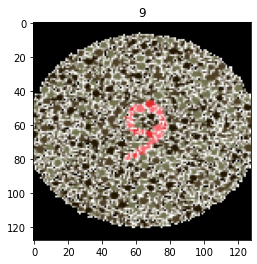

In [16]:
im = Image.open(r'D:\Datasets\Ishihara_Numbers\augmented_numbers_imgs_128_noShiftAugmentations\train\9\5598.png')
plt.title("9")
plt.imshow(im)

Success!

# Augmenting Images Again
This time, we will leave off any height/width shifts, as the whitespace in the augmented images is making our model perform worse. We will also reduce the rotation range to make it 30.  
```A model is only as good as the data it is trained on.```

In [1]:
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_generator = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# sizes = [1874, 1024, 512, 256, 96]
sizes = [128]
save_dir = r'C:\Users\HannanKhan\Downloads'

In [3]:
numbers_imgs = r'C:\Users\HannanKhan\Downloads\numbers_imgs'

for size in sizes:
    size_dir = save_dir + fr'\augmented_numbers_imgs_{size}_noShiftAugmentations'
    if not os.path.isdir(size_dir):
        os.mkdir(size_dir)
    for j in range(10):
        input_dir = numbers_imgs + '\\' + str(j)
        print(input_dir)
        size_save_dir = size_dir + fr'\{j}'
        if not os.path.isdir(size_save_dir):
            os.mkdir(size_save_dir)
        i = 0
        for batch in data_generator.flow_from_directory(input_dir,
                                                        batch_size=14,
                                                        target_size=(size,size),
                                                        save_to_dir=size_save_dir):
            i+=1
            if i >= 40:
                break

C:\Users\HannanKhan\Downloads\numbers_imgs\0
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\1
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\2
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\3
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\4
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\5
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\6
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\7
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\8
Found 14 images belonging to 1 classes.
C:\Users\HannanKhan\Downloads\numbers_imgs\9
Found 14 images belonging to 1 classes.
